# Table Of Content

- [1 - Business Problem](#1)
- [2 - Understanding Metrics](#2)
- [3 - Importing Libraries](#3)
- [4 - About Data](#4)
- [5 - EDA and Visualization](#5)
     - [5.1 - Exploring transaction data](#5.1)
     - [5.2 - Exploring Store data](#5.2)
     - [5.3 - EDA Combined data](#5.3)
- [6 - Preprocessing](#6)
     - [5.3.2 - Further Exploratory analysis](#5.5)
- [7 - Modeling](#7)
     - [7.1 - Model A](#6.1)
     - [7.2 - Model B](#6.2)
- [8 - Conclusion](#8)

<a name='1'></a>
### Problem Statement and Business Case

*  For companies to become competitive and skyrocket their growth, they need to leverage AI/ML to develop predictive models to forecast sales in the future.
*  In this project,  sales department and the sales team will like to leverage ML to be able to predict future sales for their over 1000 inventory taking into account seasonality effects, demand, holidays, promotions and competition.
*  Application areas include: Banking, Finance, Marketing, Healthcare, Insurance, Hotels, Airlines etc

<a name='2'></a>
### Inputs and Expected Output
**Two separate data set (sales and stores) with following attributes**
* Id - an Id that represents a (Store, Date) duple within the test set
* Store - a unique Id for each store
* Sales - the turnover for any given day (this is what you are predicting)
* Customers - the number of customers on a given day
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes an assortment level: a = basic, b = extra, c = extended
* CompetitionDistance - distance in meters to the nearest competitor store
* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Promo - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

<a name='3'></a>
### Importing Libraries

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<a name='4'></a>
### What the data looks like
Data Source: over 1000 inventory of sales data 

In [2]:
# This data contains the transactions recorded per day (in millions) designated as the train data
sales_data = pd.read_csv('train.csv')
sales_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
# dimension of sales data 
print("Dimension of sales/train data:", sales_data.shape)

Dimension of sales/train data: (1017209, 9)


In [4]:
# features information
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


* 9 columns in total
* 8 features each contains 1017209 data points
* 1 target variable (sales)

In [5]:
# convert date column to datetime data type
sales_data["Date"] = sales_data["Date"].astype('datetime64[ns]') 
sales_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
# check data types 
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [7]:
# descriptive statistics
sales_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


* Average sales amount per day = 5773 Euros, minimum sales per day = 0, maximum sales per day = 41551 
* Average number of customers = 633, minimum number of customers = 0, maximum number of customers = 7388

In [8]:
# check data period
sales_data['Date'].describe()

count                 1017209
unique                    942
top       2015-07-31 00:00:00
freq                     1115
first     2013-01-01 00:00:00
last      2015-07-31 00:00:00
Name: Date, dtype: object

In [9]:
# Stores data contains information 
store_data = pd.read_csv('store.csv')
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
# dimension of stores data 
print("Dimension of store data:", store_data.shape)

Dimension of store data: (1115, 10)


In [11]:
# features information
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [12]:
# descriptive statistics
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


* On average, the competition distance is 5404 meters away (5.4 kms)

<a name='5'></a>
### Exploratory Data Analysis and Cleaning

<a name='5.1'></a>
#### Sales data

In [13]:
# Check for missing sales data, luckily non!
sales_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Date'}>],
       [<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Customers'}>,
        <AxesSubplot:title={'center':'Open'}>],
       [<AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>, <AxesSubplot:>]],
      dtype=object)

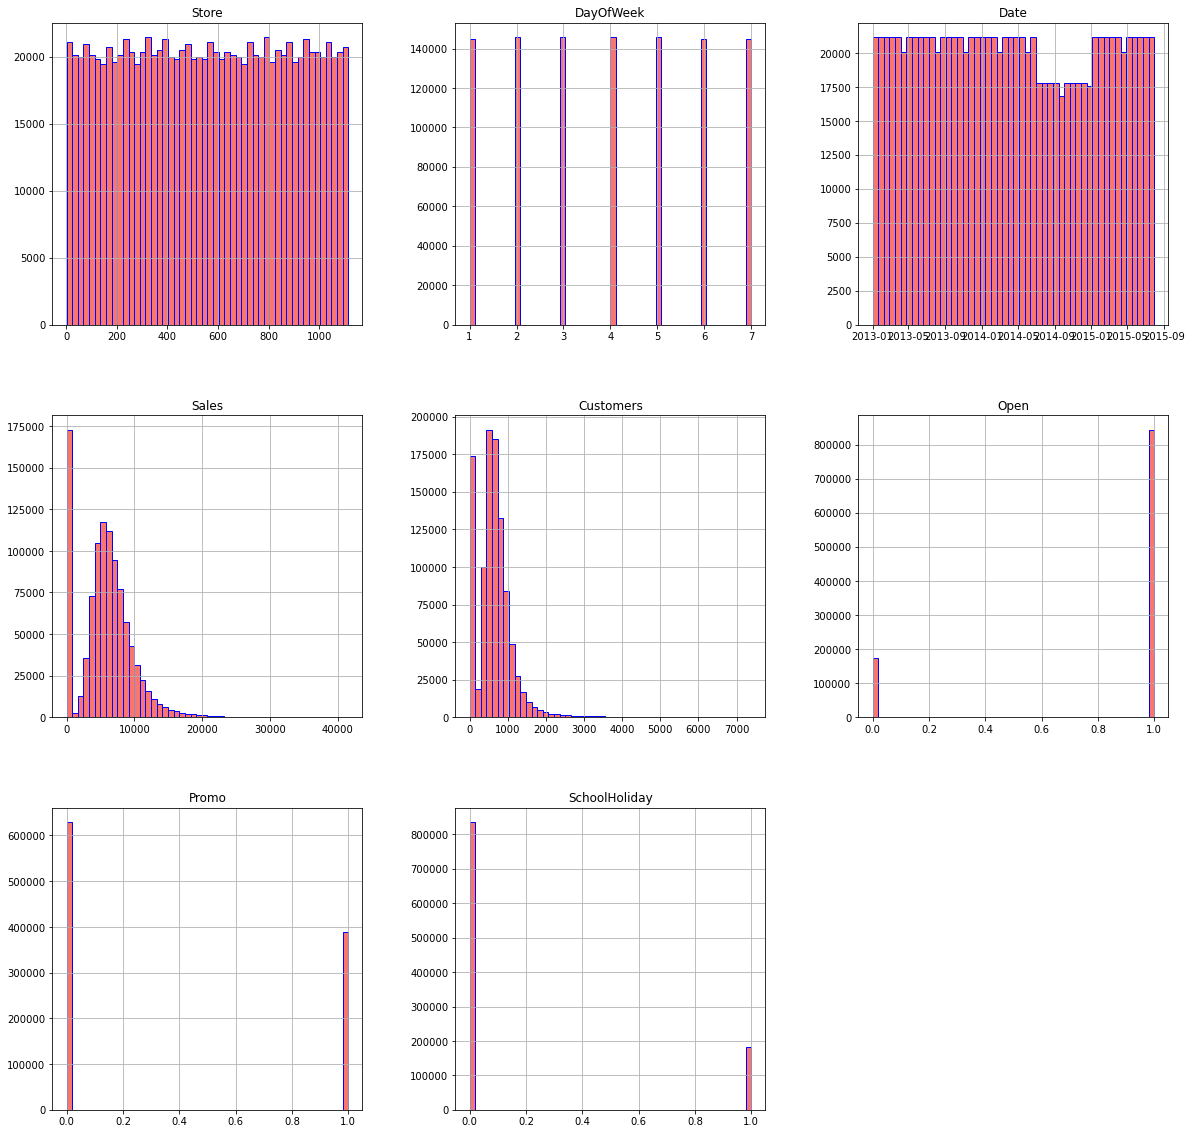

In [14]:
# visualizing all features
# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
sales_data.hist(bins = 50,  figsize = (20,20), color = color_pal[0], ec ='b')

* Data is equally distributed among all stores (no bias)
* Data is equally distributed across various Days of the week (~150000 observations x 7 day = ~1.1 million observation) 
* Average sales around 5000-6000 Euros and alot of instances of very small sales, this may be like retail sales that are happening
* Average 600 customers per day, maximum is 4500 (note that we can't see the outlier at 7388!)
* Stores are open ~80% of the time
* Promo $\#1$ was running ~40% of the time 
* School holidays are around ~18% of the time

In [15]:
# How many stores are closed and open in sales data
closed_stores = sales_data[sales_data['Open']==0]
open_stores = sales_data[sales_data['Open']==1]

# Return closed and open stores
print('Total = ', len(sales_data))
print('Number of closed stores = ', len(closed_stores))
print('Number of open stores = ', len(open_stores))

Total =  1017209
Number of closed stores =  172817
Number of open stores =  844392


In [57]:
closed_stores

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [17]:
# only keep open stores and remove closed stores
sales_data = sales_data[sales_data['Open']==1]

# drop the Open column
sales_data.drop(['Open'], axis=1, inplace=True)
sales_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


<a name='5.2'></a>
#### Store information data

In [18]:
# Missing value check, we have some!
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [19]:
# percent missing 
percent_missing = store_data.isnull().sum() * 100 / len(store_data)
missing_value = pd.DataFrame({'column_name': store_data.columns,
                                 'percent_missing': percent_missing})

# sort missing values
missing_value.sort_values('percent_missing', inplace=True)
missing_value

,column_name,percent_missing
Store,Store,0.000000
StoreType,StoreType,0.000000
Assortment,Assortment,0.000000
Promo2,Promo2,0.000000
CompetitionDistance,CompetitionDistance,0.269058
CompetitionOpenSinceMonth,CompetitionOpenSinceMonth,31.748879
CompetitionOpenSinceYear,CompetitionOpenSinceYear,31.748879
Promo2SinceWeek,Promo2SinceWeek,48.789238
Promo2SinceYear,Promo2SinceYear,48.789238
PromoInterval,PromoInterval,48.789238


* Only 3 rows are missing for 'CompetitionDistance'
* many rows are missing = 354 (almost one third of the 1115 stores) for 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear'

In [20]:
# univariate analysis for promo2
store_data[store_data['Promo2']==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


* It seems like if 'promo2' is zero, 'promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' information is set to zero
* There are 354 rows where 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' is missing

In [21]:
# Let's set these missing values to zeros 
columns = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

for str in columns:
    store_data[str].fillna(0, inplace=True)

In [22]:
# Replace Missing values for CompetitionDistance by mean
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].mean(), inplace= True)

In [23]:
# Filling CompetitionOpenSinceMonth, CompetitionOpenSinceYear with most occuring month and year respectively
mode_competition_open_month = store_data['CompetitionOpenSinceMonth'].mode()[0]

mode_competition_open_year = store_data['CompetitionOpenSinceYear'].mode()[0]

store_data['CompetitionOpenSinceMonth'].fillna(mode_competition_open_month,inplace=True)
store_data['CompetitionOpenSinceYear'].fillna(mode_competition_open_year,inplace=True)

<a name='5.3'></a>
#### Merged Data

In [24]:
# Merging data sets
combined_data = pd.merge(sales_data, store_data, how='inner', on = 'Store')
combined_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [25]:
# check the shape of the combined data 
combined_data.shape 

(844392, 17)

In [26]:
# missing value check
combined_data.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [27]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Promo                      844392 non-null  int64         
 6   StateHoliday               844392 non-null  object        
 7   SchoolHoliday              844392 non-null  int64         
 8   StoreType                  844392 non-null  object        
 9   Assortment                 844392 non-null  object        
 10  CompetitionDistance        844392 non-null  float64       
 11  CompetitionOpenSinceMonth  844392 non-null  float64 

<a name='6'></a>
##### Outlier treatment

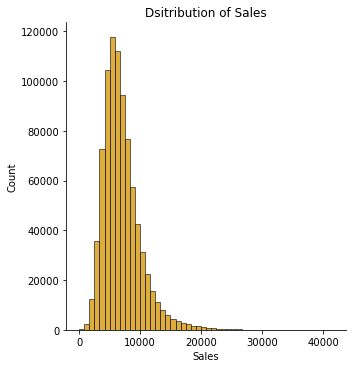

In [28]:
# Distribution of sales 
sns.displot(combined_data, x="Sales",bins=50, color= color_pal[1]).set(title='Dsitribution of Sales')

* Sales greater than 30k are very less so they might be the outliers

Mean of Sales:  6955.514290755952
Standard Deviation of Sales:  3104.212842291781
Total outlier in dataset are:  13437
Maximum Sales Outlier:  41551
Minimum Sales Outlier:  16269


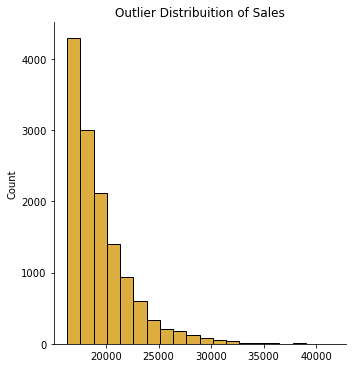

In [29]:
# Applying Z-score to detect outliers
mean_of_sales = np.mean(combined_data['Sales']) 
std_of_sales = np.std(combined_data['Sales'])
print("Mean of Sales: ",mean_of_sales)
print("Standard Deviation of Sales: ",std_of_sales)

threshold = 3
outlier = [] 
for i in combined_data['Sales']: 
    z = (i-mean_of_sales)/std_of_sales
    if z > threshold: 
        outlier.append(i) 
print('Total outlier in dataset are: ', len(outlier))
print("Maximum Sales Outlier: ", max(outlier))
print("Minimum Sales Outlier: ", min(outlier))

sns.displot(x=outlier,bins=20, color=color_pal[1]).set(title='Outlier Distribuition of Sales')

In [30]:
# Droping sales which are greater than 30k as they are very less in the dataset and are probably outliers
combined_data.drop(combined_data.loc[combined_data['Sales'] > 30000].index,inplace=True)
combined_data.shape

(844239, 17)

<AxesSubplot:>

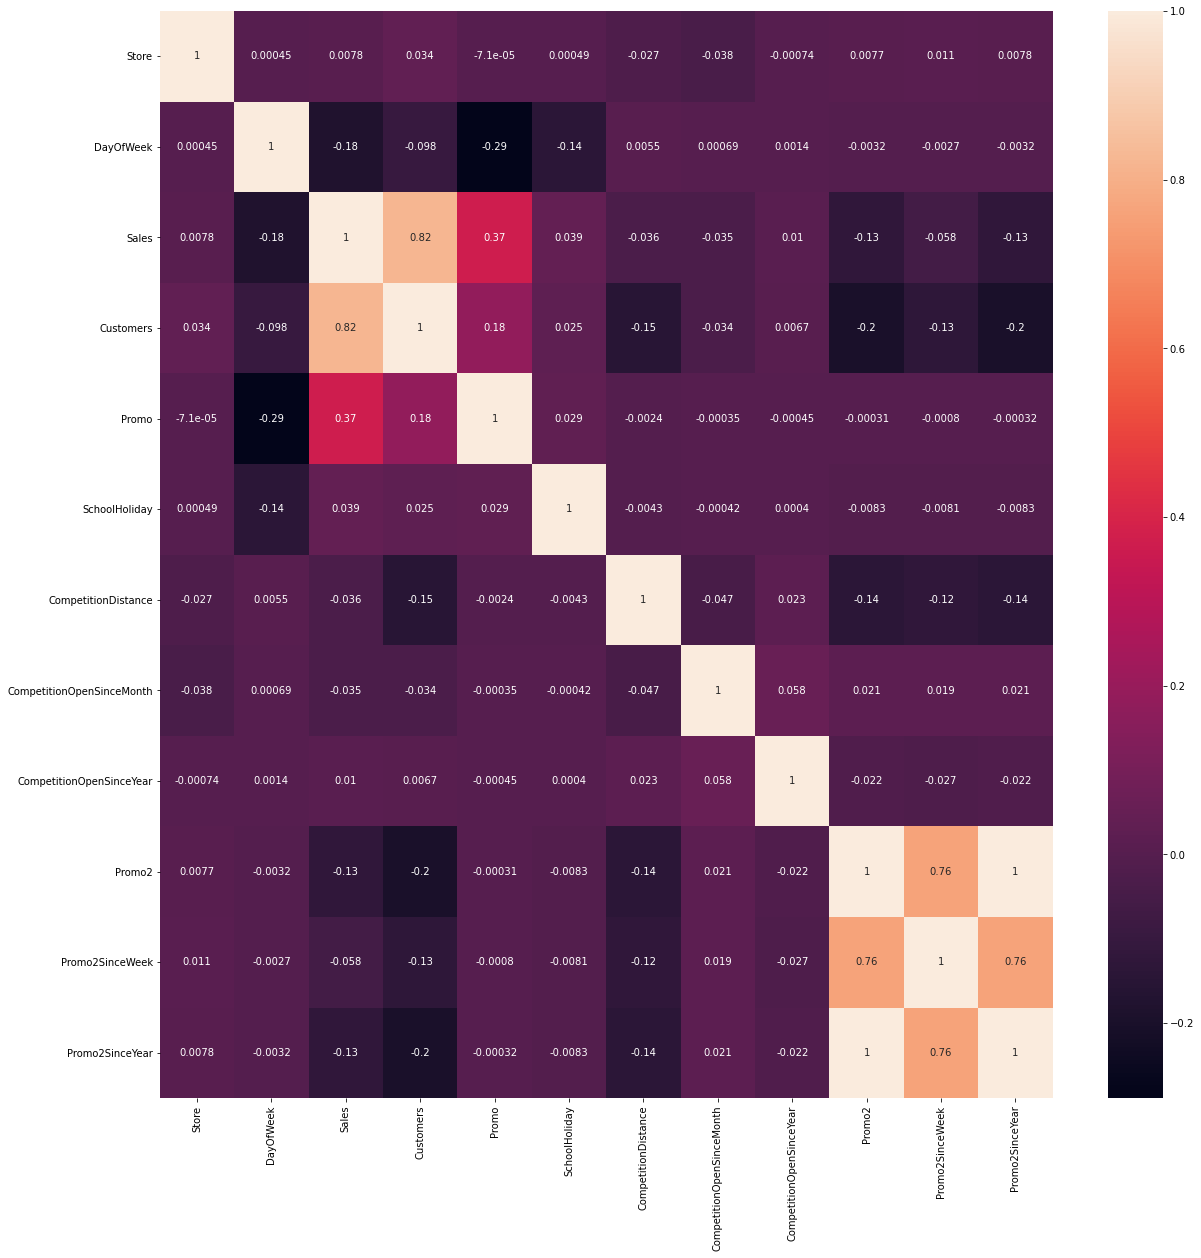

In [31]:
# Correlation between variables
correlation = combined_data.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlation, annot=True)

* Sales is highly correlated with Customers
* Promo code is highly correlated to Promo2SinceWeek, Promo2SinceYear.

In [32]:
# lets separate the year, month, day and put in new column
combined_data['Year'] = pd.DatetimeIndex(combined_data['Date']).year
combined_data['Month'] = pd.DatetimeIndex(combined_data['Date']).month
combined_data['Day'] = pd.DatetimeIndex(combined_data['Date']).day 
combined_data.head() 

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


<Figure size 432x288 with 0 Axes>

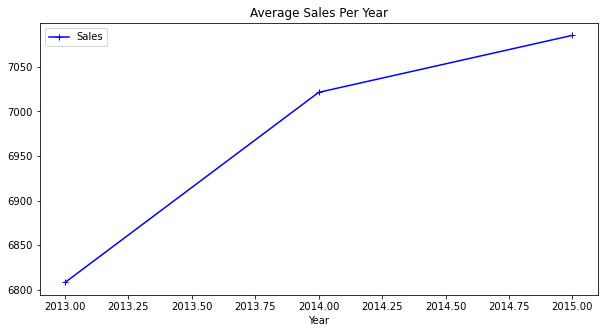

<Figure size 432x288 with 0 Axes>

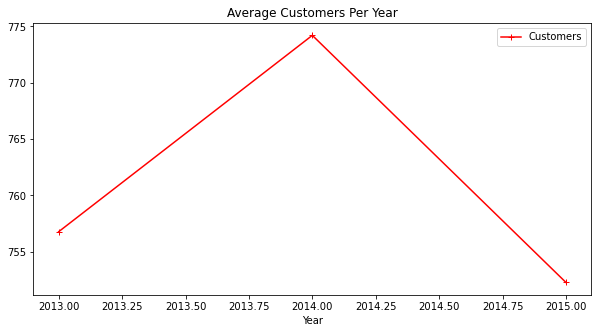

<Figure size 432x288 with 0 Axes>

In [33]:
# Let's take a look at the average sales and number of customers per year 

axis = combined_data.groupby('Year')[['Sales']].mean().plot(figsize = (10, 5), marker = '+', color = 'b')
axis.set_title('Average Sales Per Year')

plt.figure()

axis = combined_data.groupby('Year')[['Customers']].mean().plot(figsize = (10, 5), marker = '+', color = 'r')
axis.set_title('Average Customers Per Year')

plt.figure()

* Sales have been increasing year to year
* Customers peak in 2014 however drops in 2015 

<Figure size 432x288 with 0 Axes>

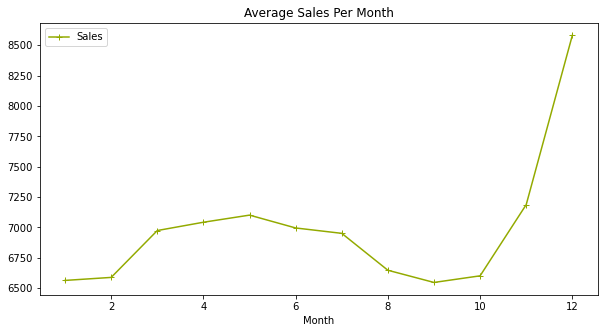

<Figure size 432x288 with 0 Axes>

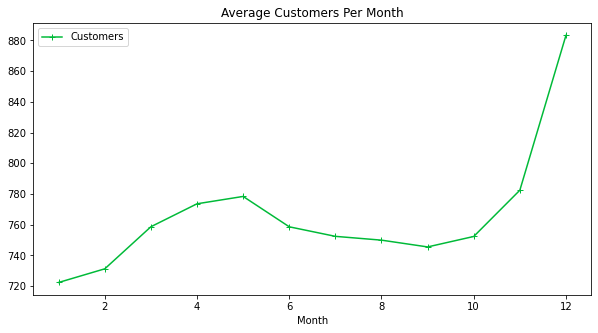

<Figure size 432x288 with 0 Axes>

In [34]:
# Let's take a look at the average sales and number of customers per month 

axis = combined_data.groupby('Month')[['Sales']].mean().plot(figsize = (10, 5), marker = '+', color = color_pal[2])
axis.set_title('Average Sales Per Month')

plt.figure()

axis = combined_data.groupby('Month')[['Customers']].mean().plot(figsize = (10, 5), marker = '+', color = color_pal[3])
axis.set_title('Average Customers Per Month')

plt.figure()

* It looks like sales and number of customers peak around christmas timeframe

<Figure size 432x288 with 0 Axes>

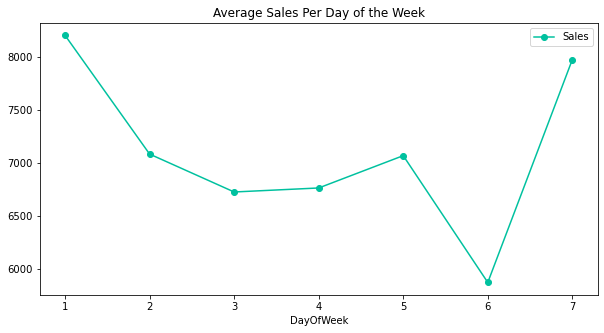

<Figure size 432x288 with 0 Axes>

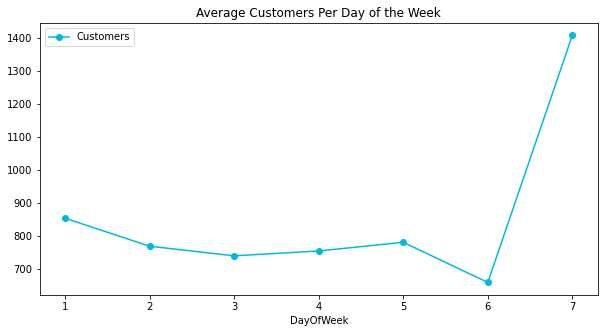

<Figure size 432x288 with 0 Axes>

In [35]:
# Let's take a look at the sales and customers per Week of the month 
axis = combined_data.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o', color = color_pal[4])
axis.set_title('Average Sales Per Day of the Week')

plt.figure()

axis = combined_data.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10, 5), marker = 'o', color = color_pal[5])
axis.set_title('Average Customers Per Day of the Week')

plt.figure()

* Average Sales on 1 (Monday) and 5 (Friday) are the highest 
* Average customers on 1 (Monday) and 5 (Friday) are the highest

<Figure size 432x288 with 0 Axes>

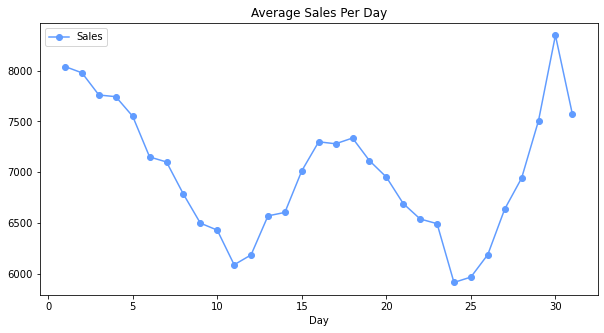

<Figure size 432x288 with 0 Axes>

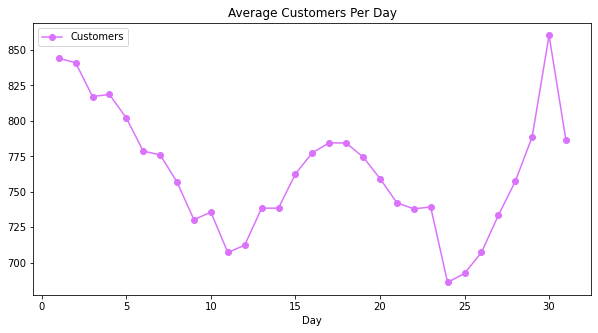

<Figure size 432x288 with 0 Axes>

In [36]:
# Let's take a look at the sales and customers per day of the month instead

axis = combined_data.groupby('Day')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o', color = color_pal[6])
axis.set_title('Average Sales Per Day')

plt.figure()

axis = combined_data.groupby('Day')[['Customers']].mean().plot(figsize = (10, 5), marker = 'o', color = color_pal[7])
axis.set_title('Average Customers Per Day')

plt.figure()

* Minimum number of customers are generally around the 24th of the month 
* Most customers and sales are around 30th and 1st of the month

<AxesSubplot:xlabel='Date'>

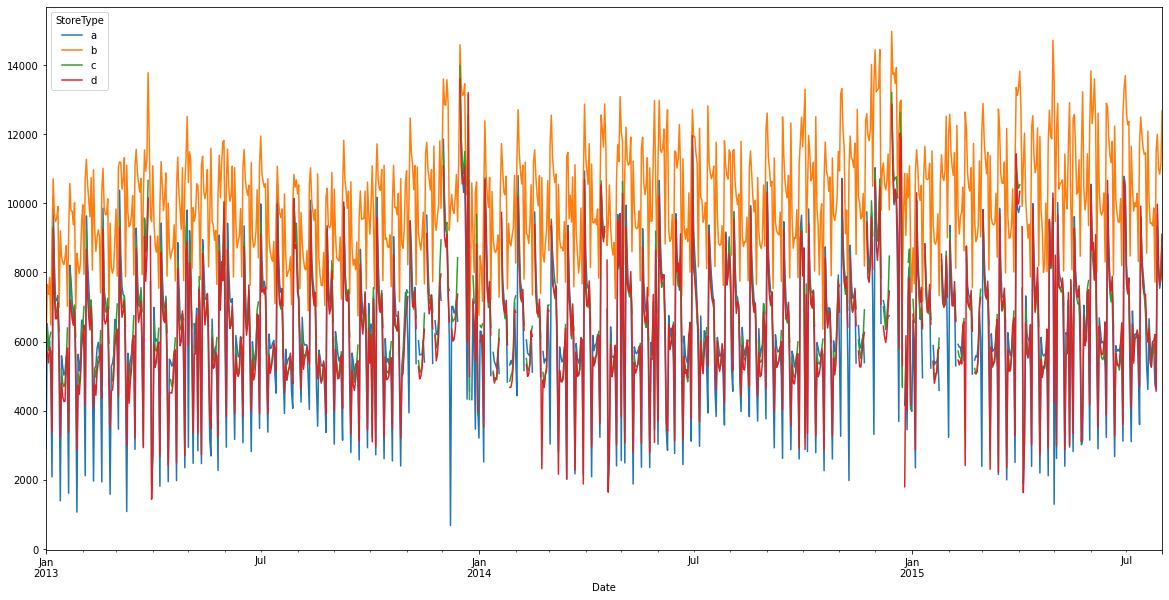

In [37]:
# Check sales for various storetype by dates
fig, ax = plt.subplots(figsize = (20, 10))

combined_data.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax) 

* Looks like store b has the highest value of average sales

[Text(0.5, 1.0, 'Promo vs Customers')]

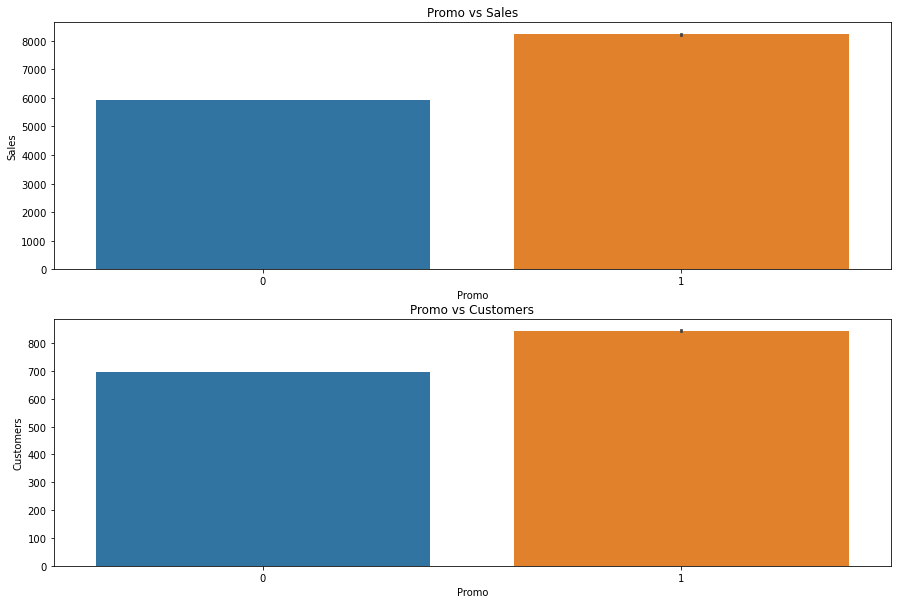

In [38]:
# bivariate data analysis for Promo and Sales, Customers
plt.figure(figsize= [15, 10])

plt.subplot(211)
sns.barplot(x = 'Promo', y = 'Sales', data = combined_data).set(title='Promo vs Sales')

plt.subplot(212)
sns.barplot(x = 'Promo', y = 'Customers', data = combined_data).set(title='Promo vs Customers')

* Customers are definately attracted by Promo codes thus sales are higher when there is a Promo code in a Store

In [39]:
# Univariate analysis of stateholiday
# value count
combined_data['StateHoliday'].value_counts()

0    731214
0    112133
a       683
b       139
c        70
Name: StateHoliday, dtype: int64

In [40]:
# StateHoliday column has values 0 & "0", So, we need to change values with 0 to "0"
combined_data["StateHoliday"].loc[combined_data["StateHoliday"] == 0] = "0"

In [41]:
# check value count again
combined_data['StateHoliday'].value_counts()

0    843347
a       683
b       139
c        70
Name: StateHoliday, dtype: int64

In [42]:
# create custom dataframe for state holiday sales
stateholiday_sales = combined_data.groupby(["StateHoliday"])['Sales'].sum()

category = list(stateholiday_sales.keys())
sales_count = list(stateholiday_sales.values)

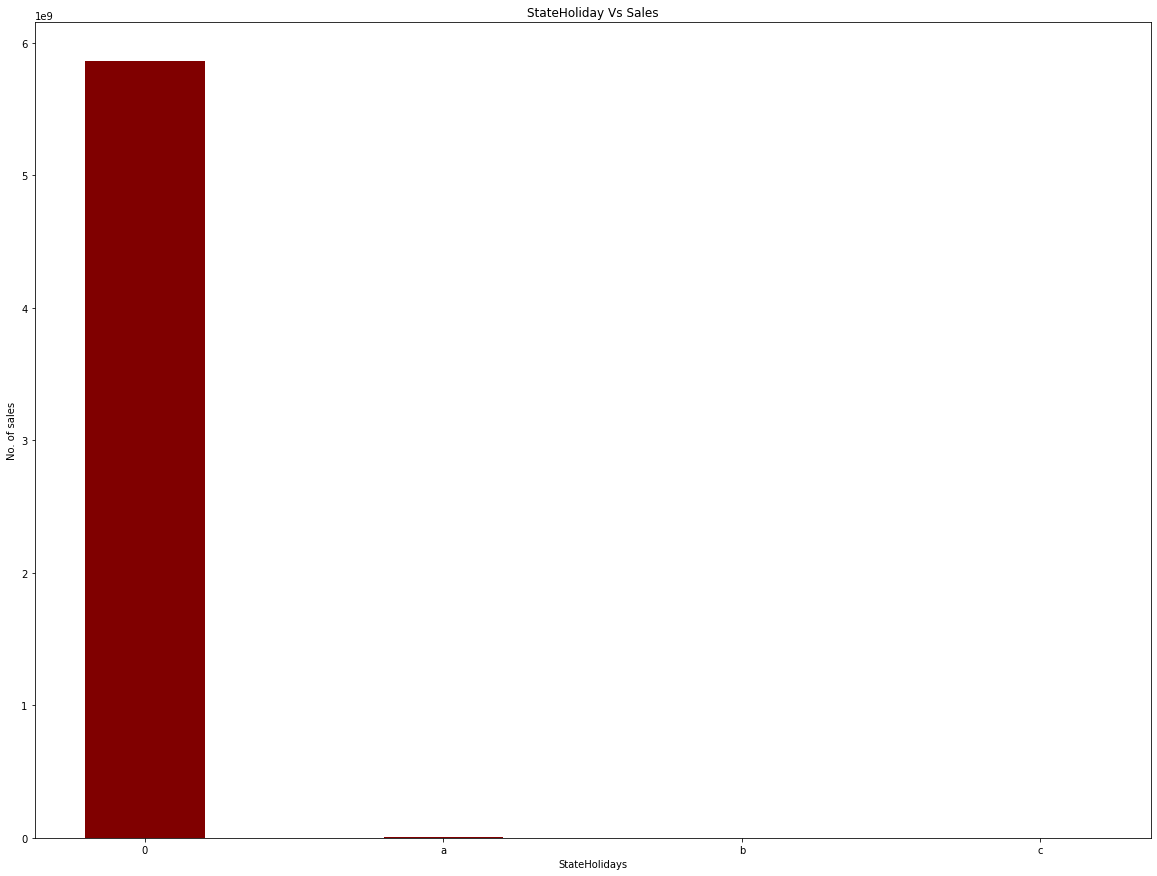

In [43]:
plt.figure(figsize=(20,15))
plt.bar(category, sales_count, color ='maroon',
        width = 0.4)
 
plt.xlabel("StateHolidays")
plt.ylabel("No. of sales")
plt.title("StateHoliday Vs Sales")
plt.show()

* Most stores are closed on State Holidays that's why we can see that there are very less sales in a,b,c where:
  * a = Public Holiday
  * b = Easter Holiday
  * c = Christmas 
  * 0 = No Holiday, Working day

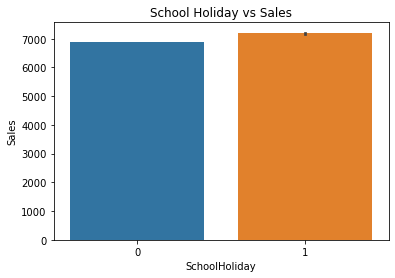

In [44]:
# Bivariate analysis for SchoolHolidays and Sales
# Sales with respect to School Holiday
sns.barplot(x='SchoolHoliday', y='Sales', data=combined_data).set(title='School Holiday vs Sales')
plt.show()

* On School holidays they are more sales, well funny enough it could be that some kids are taking parents to store to do shopping!

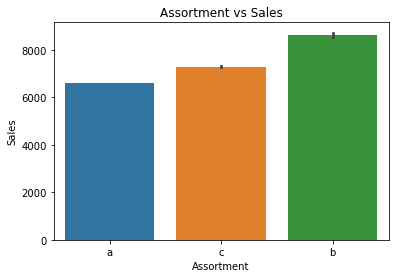

In [45]:
# Sales with respect to Assortment
sns.barplot(x='Assortment', y='Sales', data=combined_data).set(title='Assortment vs Sales')
plt.show()

* Assortment level b have the highest sales
* Assortment levels:
   * a = basic
   * b = extra
   * c = entended

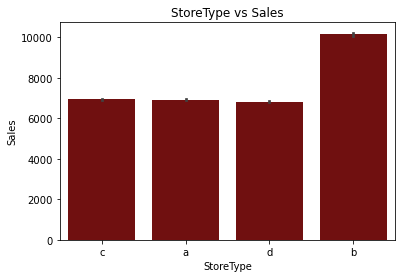

In [46]:
# Sales with respect to StoreType
sns.barplot(x='StoreType', y='Sales', data=combined_data, color='maroon').set(title='StoreType vs Sales')
plt.show()

* a,b,c,d are store models where b type stores have the highest sales 

<AxesSubplot:title={'center':'Sales vs CompetitionDistance'}, xlabel='CompetitionDistance', ylabel='Sales'>

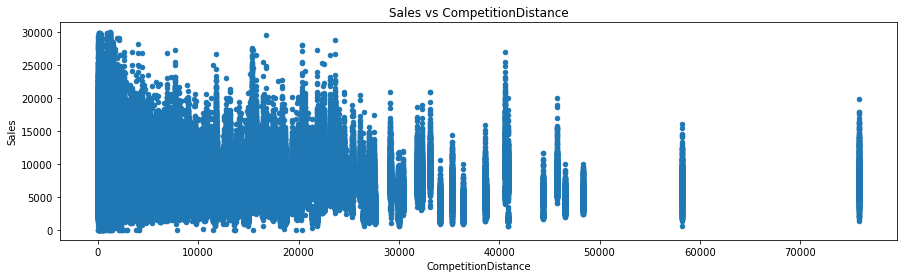

In [47]:
# bivariate analysis for Sales and CompetitionDistance
combined_data.plot(kind='scatter',x='CompetitionDistance',y='Sales',figsize=(15,4),title="Sales vs CompetitionDistance")

<a name='7'></a>
### Modeling with Facebook Prophet

Additive regression model . At its core is the sum of three function plus error term $$ y(t) =g(t) + s(t) + h(t) + \epsilon(t)$$  The function $g(t)$ is the growth, $s(t)$ the seasonality and $h(t)$ holidays are unknown smoothing functions fit from the data .$\epsilon(t)$ : error term accounts for any unusual changes not accommodated by the model.

<a name='7.1'></a>
#### Model A

In [48]:
conda install -c conda-forge fbprophet=0.6.0


Note: you may need to restart the kernel to use updated packages.


In [49]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [59]:
# Function that takes in the data frame, storeID, and number of future period forecast
# The function then generates date/sales columns in Prophet format
# The function then makes time series predictions
def sales_predictions(Store_ID, sales_df, periods):
    sales_df = sales_df[sales_df['Store'] == Store_ID]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
    
    model=Prophet(interval_width=0.95, yearly_seasonality=True, n_changepoints=20)
    model.fit(sales_df)
    future =  model.make_future_dataframe(periods = periods, freq = 'D') 
    forecast = model.predict(future)
    figure = model.plot(forecast, uncertainty= True, xlabel = 'Date', ylabel = 'Sales')
    
    # Add lines to reveal detected changepoints
    a = add_changepoints_to_plot(figure.gca(), model, forecast)
    figure2 = model.plot_components(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


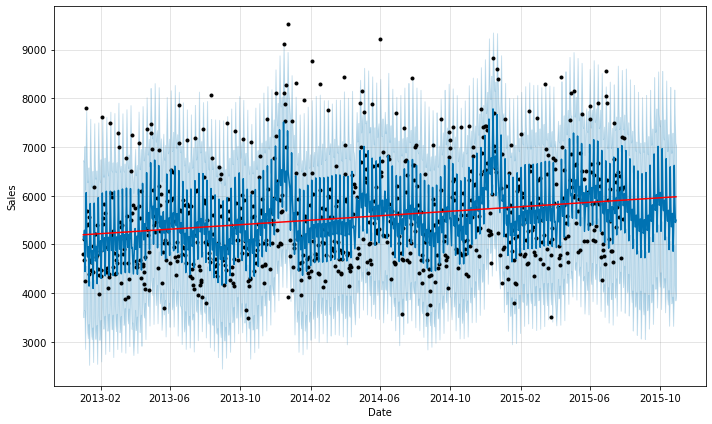

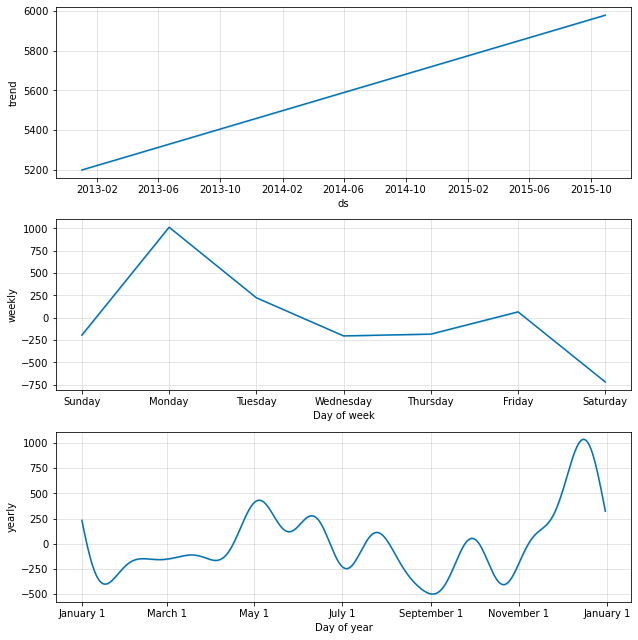

In [60]:
# Random Prediction and plot the decomposable trend
sales_predictions(10, combined_data, 90)

* It shows historical data up till 2015-07 and then forecast the sales till 2015-11
* The trends are going up i.e sales are going up
* Sales happen around Monday  where it peaks, I think this can be supported by fact that many people like to shop on Monday simply as a way to cope with the start of a new workweek 
* Peaks up around May and December.

<a name='7.2'></a>
#### Model B

In [52]:
# Domain Knowledge integration i.e manually add domain specific knowledge
def sales_predictions(Store_ID, sales_df, holidays, periods):
    sales_df = sales_df[sales_df['Store'] == Store_ID]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
    
    model = Prophet(interval_width= 0.95, holidays= holidays)
    model.fit(sales_df)
    future =  model.make_future_dataframe(periods = periods, freq = 'D')
    forecast = model.predict(future)
    figure = model.plot(forecast, xlabel = 'Date', ylabel = 'Sales')
    
    # Add lines to reveal detected changepoints
    a = add_changepoints_to_plot(figure.gca(), model, forecast)
    figure2 = model.plot_components(forecast)

In [53]:
# Get all the dates pertaining to shcool holidays
school_holidays = combined_data[combined_data['SchoolHoliday'] ==1].loc[:, 'Date'].values
school_holidays.shape 

(163428,)

In [54]:
# Get all the dates pertaining to state holidays
state_holidays = combined_data[(combined_data['StateHoliday'] == 'a') | (combined_data['StateHoliday'] == 'b') | 
                               (combined_data['StateHoliday'] == 'c')].loc[:, 'Date'].values
state_holidays.shape 

(892,)

In [55]:
# Create dataframe for school holiday
school_holidays = pd.DataFrame({'ds' : pd.to_datetime(school_holidays),
                              'holiday': 'school_holiday'})

# create dataframe for state holiday
state_holidays = pd.DataFrame({'ds' : pd.to_datetime(state_holidays),
                              'holiday': 'state_holiday'})

# concatenate the two dataframes together

#concatenate both
school_state_holidays = pd.concat([state_holidays, school_holidays])
school_state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
163423,2013-02-05,school_holiday
163424,2013-02-04,school_holiday
163425,2013-01-04,school_holiday
163426,2013-01-03,school_holiday


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


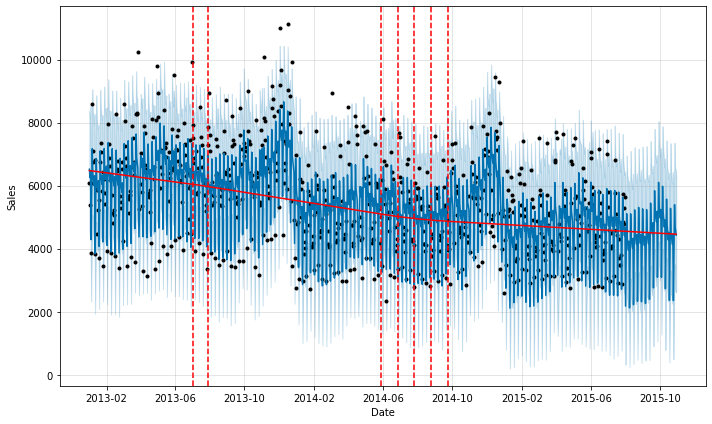

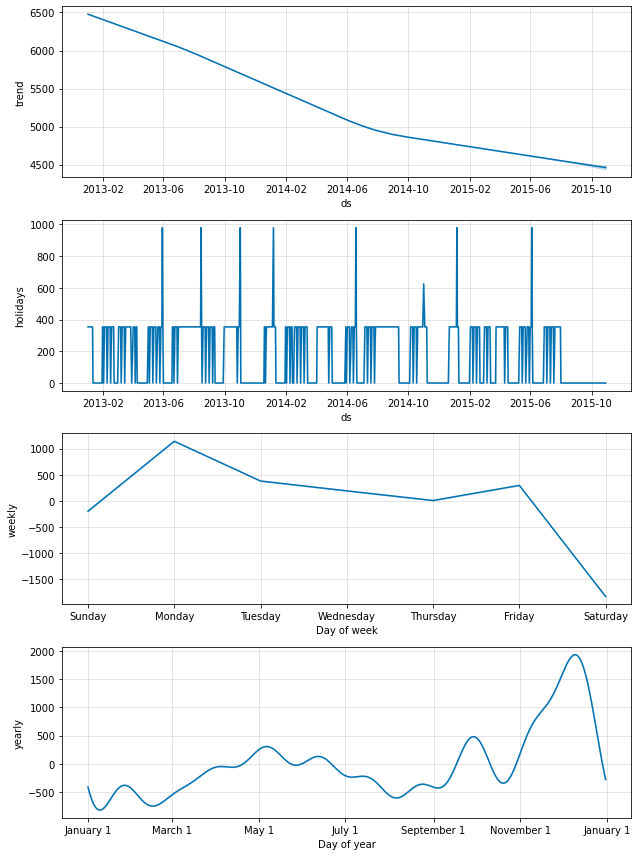

In [56]:
#lets make predictions 
sales_predictions(6, combined_data, school_state_holidays, 90)

* We have been able to incorporate state and school holidays and make predictions for 90 days in the future
  * Trend is going down and for holidays the spikes around December timeframe
  * December shopping timeframe peaks

<a name='8'></a>
### Conclusion

* For Model A, consist of the  weakly seasonality and yearly seasonality component.
* For ModeL B, consist of weakly seasonality, yearly seasonality and Holidays
* Feature engineering is very important. e.g. removal of the 'Open'. feature
* Closer competiton distance make stores more competitive and thus using Promo codes can help them to boost sales 
* Store Type affects the sales
* Promo code can help increase in the competition and lead to more sales
* Since most of the stores are closed on Holidays, the feature has no effect on sales